In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
ins=pd.read_csv("insurance.csv")
ins.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
ins.shape

(1338, 7)

In [6]:
ins.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [7]:
ins.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
ins.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
ins.smoker.unique()

array(['yes', 'no'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(ins.sex)
le.fit(ins.smoker)

LabelEncoder()

In [11]:
ins.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

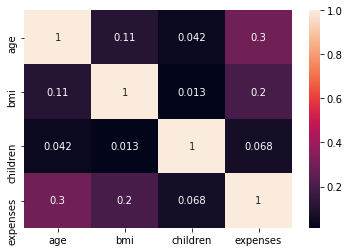

In [12]:
#HEATMAP
sns.heatmap(ins.corr(),annot=True)

In [13]:
x=ins.drop("expenses",axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [14]:
x=pd.get_dummies(x)
x.head(10)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
5,31,25.7,0,1,0,1,0,0,0,1,0
6,46,33.4,1,1,0,1,0,0,0,1,0
7,37,27.7,3,1,0,1,0,0,1,0,0
8,37,29.8,2,0,1,1,0,1,0,0,0
9,60,25.8,0,1,0,1,0,0,1,0,0


In [15]:
y=ins[['expenses']]
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [16]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=20)

In [17]:
x1.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1204,18,27.3,3,1,0,0,1,0,0,1,0
829,39,21.9,1,0,1,1,0,0,1,0,0
1077,21,26.0,0,0,1,1,0,1,0,0,0
416,52,34.1,0,0,1,1,0,0,0,1,0
1295,20,22.0,1,0,1,1,0,0,0,0,1


In [18]:
x1.shape,x2.shape,y1.shape,y2.shape

((1070, 11), (268, 11), (1070, 1), (268, 1))

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [20]:
a=model.predict(x2)

In [21]:
model.score(x2,y2)*100

79.59358662345164

In [22]:
a[:5]

array([[13305.67455264],
       [ 9983.61120982],
       [11682.24373697],
       [18032.37551645],
       [ 4740.7997512 ]])

In [23]:
x2[3:4]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
908,63,39.8,3,0,1,1,0,0,0,0,1


In [24]:
new_data=[50,49,2,1,0,0,1,1,0,0,0]
new_data=np.array(new_data).reshape(1,-1)
model.predict(new_data)

C:\Users\Chiranjeevi\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[42202.66084618]])

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.43876426, -0.4536457 , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.51418574, -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38295436,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.02270734, -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79812808, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.25679863, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [26]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_mms=mms.fit_transform(x1)
x_test_mms=mms.transform(x2)
print(x_train_mms)

[[0.         0.29329609 0.6        ... 0.         1.         0.        ]
 [0.45652174 0.1424581  0.2        ... 1.         0.         0.        ]
 [0.06521739 0.25698324 0.         ... 0.         0.         0.        ]
 ...
 [0.32608696 0.35195531 0.8        ... 0.         0.         1.        ]
 [0.69565217 0.48603352 0.4        ... 0.         0.         1.        ]
 [0.7826087  0.23184358 0.6        ... 0.         0.         1.        ]]
